In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime
import calendar
import folium
from folium import plugins
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
may_trip = pd.read_csv('data/may_trip.csv')
may_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [5]:
may_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 16 columns):
pubTimeStamp      224969 non-null object
companyName       224969 non-null object
tripRecordNum     224969 non-null object
sumdID            224969 non-null object
tripDuration      224969 non-null float64
tripDistance      224969 non-null float64
startDate         224969 non-null object
startTime         224969 non-null object
endDate           224969 non-null object
endTime           224969 non-null object
startLatitude     224969 non-null float64
startLongitude    224969 non-null float64
endLatitude       224969 non-null float64
endLongitude      224969 non-null float64
tripRoute         224969 non-null object
create_dt         224969 non-null object
dtypes: float64(6), object(10)
memory usage: 27.5+ MB


In [6]:
may_trip.shape

(224969, 16)

In [16]:
may_trip['pubTimeStamp']=pd.to_datetime(may_trip.pubTimeStamp)

In [17]:
may_trip['startDate']=pd.to_datetime(may_trip.startDate)

In [18]:
may_trip['startTime']=pd.to_datetime(may_trip.startTime)

In [19]:
may_trip['endDate']=pd.to_datetime(may_trip.endDate)

In [20]:
may_trip['endTime']=pd.to_datetime(may_trip.endTime)

In [7]:
may_trip.companyName.value_counts()

Lime             102569
Lyft              54271
Bird              53496
SPIN               8471
Bolt Mobility      4912
Gotcha              650
JUMP                600
Name: companyName, dtype: int64

In [8]:
may_trip.sumdID.value_counts()

PoweredUNKNOWN                                 2166
Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2     600
PoweredWVIAXNCVDNOXP                            338
PoweredR3QXO6TL2HIAB                            291
PoweredRJ7YYJTHAR5N3                            274
                                               ... 
PoweredS3C46                                      1
Powered7910156                                    1
PoweredZ9AWB                                      1
Powered8JKQA                                      1
PoweredA3QE2                                      1
Name: sumdID, Length: 6966, dtype: int64

In [11]:
unknownscooters = may_trip.loc[may_trip.sumdID == 'PoweredUNKNOWN']
unknownscooters

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
54,2019-05-01 00:25:56.567000,Bird,BRD2254,PoweredUNKNOWN,0.0,0.0,2019-05-01 00:00:00,00:26:58.376666,2019-05-01 00:00:00,00:27:07.540000,36.1518,-86.8152,36.1518,-86.8152,[],2019-05-02 05:30:26.497000
184,2019-05-01 01:05:58.023000,Bird,BRD2413,PoweredUNKNOWN,1.0,0.0,2019-05-01 00:00:00,01:05:18.350000,2019-05-01 00:00:00,01:06:07.786666,36.1402,-86.8062,36.1402,-86.8062,[],2019-05-02 05:30:32.100000
188,2019-05-01 01:05:58.023000,Bird,BRD2412,PoweredUNKNOWN,1.0,0.0,2019-05-01 00:00:00,01:06:31.300000,2019-05-01 00:00:00,01:07:11.496666,36.1402,-86.8062,36.1402,-86.8062,[],2019-05-02 05:30:32.070000
199,2019-05-01 01:10:58.383000,Bird,BRD2442,PoweredUNKNOWN,5.0,0.0,2019-05-01 00:00:00,01:06:45.440000,2019-05-01 00:00:00,01:11:35.563333,36.1612,-86.7843,36.1612,-86.7843,[],2019-05-02 05:30:32.893000
202,2019-05-01 01:10:58.383000,Bird,BRD2441,PoweredUNKNOWN,0.0,0.0,2019-05-01 00:00:00,01:11:40.936666,2019-05-01 00:00:00,01:11:52.916666,36.1571,-86.7651,36.1571,-86.7651,[],2019-05-02 05:30:32.827000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224014,2019-05-31 23:15:44.663000,Bird,BRD3246,PoweredUNKNOWN,0.0,0.0,2019-05-31 00:00:00,23:16:52.573333,2019-05-31 00:00:00,23:17:19.696666,36.1430,-86.7992,36.1430,-86.7992,[],2019-06-01 05:31:34.550000
224083,2019-05-31 23:30:45.293000,Bird,BRD3366,PoweredUNKNOWN,0.0,0.0,2019-05-31 00:00:00,23:30:59.600000,2019-05-31 00:00:00,23:31:03.150000,36.1552,-86.7763,36.1552,-86.7763,[],2019-06-01 05:31:36.093000
224100,2019-05-31 23:35:45.407000,Bird,BRD3405,PoweredUNKNOWN,2.0,0.0,2019-05-31 00:00:00,23:34:28.253333,2019-05-31 00:00:00,23:36:06.503333,36.1650,-86.7763,36.1650,-86.7763,[],2019-06-01 05:31:36.500000
224457,2019-05-31 23:50:46.233000,Bird,BRD3504,PoweredUNKNOWN,1.0,0.0,2019-05-31 00:00:00,23:51:28.176666,2019-05-31 00:00:00,23:52:05.050000,36.1578,-86.8171,36.1578,-86.8171,[],2019-06-01 05:31:38.027000


In [12]:
unknownscooters.companyName.value_counts()

Bird    2166
Name: companyName, dtype: int64

In [13]:
unknownscooters.tripDuration.value_counts()

0.0     1211
1.0      385
2.0      136
3.0       76
4.0       68
5.0       60
6.0       52
8.0       35
7.0       30
10.0      21
9.0       19
11.0      17
15.0      16
13.0      12
14.0       6
12.0       5
17.0       4
16.0       3
20.0       3
35.0       2
25.0       1
27.0       1
29.0       1
18.0       1
30.0       1
Name: tripDuration, dtype: int64

In [15]:
unknown = unknownscooters.loc[unknownscooters.tripDuration == 0.0]
unknown

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
54,2019-05-01 00:25:56.567000,Bird,BRD2254,PoweredUNKNOWN,0.0,0.000,2019-05-01 00:00:00,00:26:58.376666,2019-05-01 00:00:00,00:27:07.540000,36.1518,-86.8152,36.1518,-86.8152,[],2019-05-02 05:30:26.497000
202,2019-05-01 01:10:58.383000,Bird,BRD2441,PoweredUNKNOWN,0.0,0.000,2019-05-01 00:00:00,01:11:40.936666,2019-05-01 00:00:00,01:11:52.916666,36.1571,-86.7651,36.1571,-86.7651,[],2019-05-02 05:30:32.827000
310,2019-05-01 01:51:00.130000,Bird,BRD2599,PoweredUNKNOWN,0.0,2296.588,2019-05-01 00:00:00,01:51:46.143333,2019-05-01 00:00:00,01:52:04.033333,36.1733,-86.7854,36.1733,-86.7854,[],2019-05-02 05:30:36.483000
958,2019-05-01 12:46:30.237000,Bird,BRD103,PoweredUNKNOWN,0.0,0.000,2019-05-01 00:00:00,12:46:28.766666,2019-05-01 00:00:00,12:46:39.456666,36.1561,-86.7658,36.1561,-86.7658,[],2019-05-02 05:30:57.173000
1028,2019-05-01 13:56:33.220000,Bird,BRD206,PoweredUNKNOWN,0.0,0.000,2019-05-01 00:00:00,13:56:42.553333,2019-05-01 00:00:00,13:57:00.313333,36.1540,-86.7802,36.1540,-86.7802,[],2019-05-02 05:31:02.057000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223565,2019-05-31 22:20:40.707000,Bird,BRD2913,PoweredUNKNOWN,0.0,0.000,2019-05-31 00:00:00,22:21:55.836666,2019-05-31 00:00:00,22:22:05.976666,36.1600,-86.7787,36.1600,-86.7787,[],2019-06-01 05:31:29.360000
223934,2019-05-31 22:50:43.377000,Bird,BRD3083,PoweredUNKNOWN,0.0,0.000,2019-05-31 00:00:00,22:50:35.443333,2019-05-31 00:00:00,22:50:51.046666,36.1609,-86.7812,36.1609,-86.7812,[],2019-06-01 05:31:31.927000
223993,2019-05-31 23:10:44.293000,Bird,BRD3213,PoweredUNKNOWN,0.0,0.000,2019-05-31 00:00:00,23:10:32.350000,2019-05-31 00:00:00,23:10:46.490000,36.1632,-86.7915,36.1632,-86.7915,[],2019-06-01 05:31:33.953000
224014,2019-05-31 23:15:44.663000,Bird,BRD3246,PoweredUNKNOWN,0.0,0.000,2019-05-31 00:00:00,23:16:52.573333,2019-05-31 00:00:00,23:17:19.696666,36.1430,-86.7992,36.1430,-86.7992,[],2019-06-01 05:31:34.550000


In [39]:
##mayzero=may_trip.groupby('sumdID').agg({'tripDuration': lambda x : sum(x==0.0)})
mayzero = may_trip.loc[may_trip.tripDuration==0.00]
mayzero.head()


,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
54,2019-05-01 00:25:56.567,Bird,BRD2254,PoweredUNKNOWN,0.0,0.000,2019-05-01,2019-09-12 00:26:58.376666,2019-05-01,2019-09-12 00:27:07.540000,36.1518,-86.8152,36.1518,-86.8152,[],2019-05-02 05:30:26.497000
202,2019-05-01 01:10:58.383,Bird,BRD2441,PoweredUNKNOWN,0.0,0.000,2019-05-01,2019-09-12 01:11:40.936666,2019-05-01,2019-09-12 01:11:52.916666,36.1571,-86.7651,36.1571,-86.7651,[],2019-05-02 05:30:32.827000
213,2019-05-01 01:15:58.413,Bird,BRD2472,PoweredKU3Z3,0.0,0.000,2019-05-01,2019-09-12 01:17:28.820000,2019-05-01,2019-09-12 01:17:45.083333,36.1754,-86.7559,36.1754,-86.7559,"[[36.175385,-86.755707],[36.175385,-86.755707]]",2019-05-02 05:30:33.110000
310,2019-05-01 01:51:00.130,Bird,BRD2599,PoweredUNKNOWN,0.0,2296.588,2019-05-01,2019-09-12 01:51:46.143333,2019-05-01,2019-09-12 01:52:04.033333,36.1733,-86.7854,36.1733,-86.7854,[],2019-05-02 05:30:36.483000
394,2019-05-01 02:26:02.163,Bird,BRD2750,PoweredHIRY6,0.0,0.000,2019-05-01,2019-09-12 02:27:12.186666,2019-05-01,2019-09-12 02:27:21.420000,36.1622,-86.7828,36.1622,-86.7828,"[[36.162171,-86.782855]]",2019-05-02 05:30:40.340000


In [31]:
may_trip.columns

Index(['pubTimeStamp', 'companyName', 'tripRecordNum', 'sumdID',
       'tripDuration', 'tripDistance', 'startDate', 'startTime', 'endDate',
       'endTime', 'startLatitude', 'startLongitude', 'endLatitude',
       'endLongitude', 'tripRoute', 'create_dt'],
      dtype='object')

In [43]:
mayzero.groupby(["tripDuration","sumdID"]).size().head(5)

tripDuration  sumdID      
0.0           Powered14477    2
              Powered145AD    1
              Powered1BBZ2    1
              Powered21QXZ    1
              Powered29LTL    1
dtype: int64

In [44]:
may_trip.sumdID == 'Powered14477'

0         False
1         False
2         False
3         False
4         False
          ...  
224964    False
224965    False
224966    False
224967    False
224968    False
Name: sumdID, Length: 224969, dtype: bool

In [47]:
unknown.groupby(["tripDuration","sumdID"]).size()

tripDuration  sumdID        
0.0           PoweredUNKNOWN    1211
dtype: int64

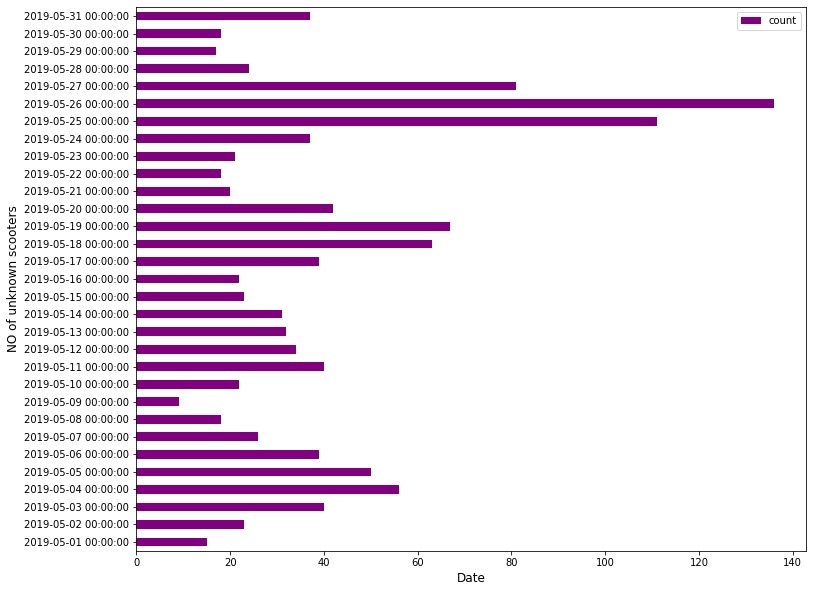

In [49]:
##count of unknown scooter ID which was inactive for the whole month
unknown.groupby('startDate').sumdID.agg(['count']).plot(kind = 'barh',color='purple',figsize=(12,10))
plt.xlabel('Date',fontsize=12)
plt.ylabel('NO of unknown scooters',fontsize=12);

In [50]:
m = folium.Map(location=[36.159485,-86.779553], zoom_start=12)
for _, row in unknown.iterrows():
   folium.CircleMarker([row['startLatitude'], row['startLongitude']],
                       #radius=15,
                       fill_color="#3db7e4", # divvy color
                      ).add_to(m)
   folium.CircleMarker([row['endLatitude'], row['endLongitude']],
                       #radius=15,
                       fill_color="black", # divvy color
                      ).add_to(m)
   folium.PolyLine([[row['startLatitude'], row['startLongitude']],
                    [row['endLatitude'], row['endLongitude']]]).add_to(m)
m

There are around 1211 unknown sumdID which were inactive for the whole month. 